<a href="https://colab.research.google.com/github/KesavanSankar/Customer_Shopping_Retail_Sales_Analysis/blob/main/customer_shopping_retail_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/content/sample_data/customer_shopping_data.csv")

In [ ]:
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
69121,I230242,C651346,Female,67,Food & Beverage,4,20.92,Cash,1/4/2021,Kanyon
69122,I159557,C234753,Female,40,Cosmetics,4,162.64,Credit Card,31/07/2021,Mall of Istanbul
69123,I699021,C269282,Male,63,Clothing,4,1200.32,Debit Card,7/11/2021,Metrocity
69124,I110718,C734127,Female,31,Shoes,3,1800.51,Credit Card,4/8/2021,Kanyon


In [ ]:
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [ ]:
df.shape

(99457, 10)

In [ ]:
df.size

994570

In [ ]:
df.nunique()

invoice_no        99457
customer_id       99457
gender                2
age                  52
category              8
quantity              5
price                40
payment_method        3
invoice_date        797
shopping_mall        10
dtype: int64

In [4]:
df=df.drop(axis=True,columns='invoice_no')

In [ ]:
df['invoice_date']=df['invoice_date'].apply(pd.to_datetime)

In [ ]:
df.isnull().sum()

customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   customer_id     99457 non-null  object        
 1   gender          99457 non-null  object        
 2   age             99457 non-null  int64         
 3   category        99457 non-null  object        
 4   quantity        99457 non-null  int64         
 5   price           99457 non-null  float64       
 6   payment_method  99457 non-null  object        
 7   invoice_date    99457 non-null  datetime64[ns]
 8   shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 6.8+ MB


In [ ]:
df.duplicated().value_counts()

False    99457
dtype: int64

In [ ]:
df['gender'].value_counts().sort_index(ascending=False)

Male      39975
Female    59482
Name: gender, dtype: int64

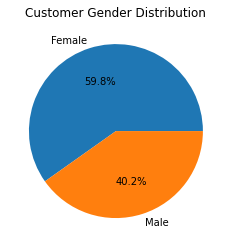

In [5]:
# Calculate the count of each gender

gender_count=df['gender'].value_counts()

#create pie chart

fig,ax=plt.subplots()
ax.pie(gender_count,labels=gender_count.index,autopct='%1.1f%%')

ax.set_title('Customer Gender Distribution')
plt.show()

In [ ]:
gender_count

Female    59482
Male      39975
Name: gender, dtype: int64

In [ ]:
category_df=df['category'].value_counts()

In [ ]:
category_df

Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: category, dtype: int64

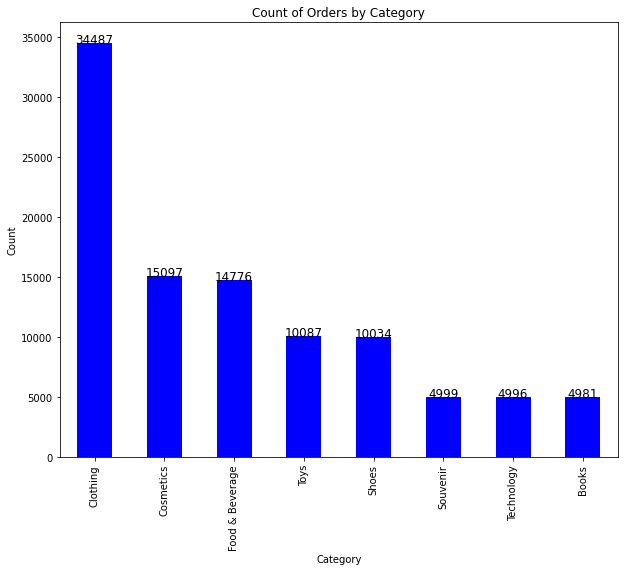

In [ ]:
# create a bar chart to visualize the count of each category

fig,ax=plt.subplots(figsize=(10,8))
category_df.plot(kind='bar',color='blue')
plt.title('Count of Orders by Category')
ax.set_xlabel("Category")
ax.set_ylabel("Count")

#add labels to bar

for i,count in enumerate(category_df):
  plt.text(i,count,str(count),color='black',ha='center',fontsize=12)

plt.show()

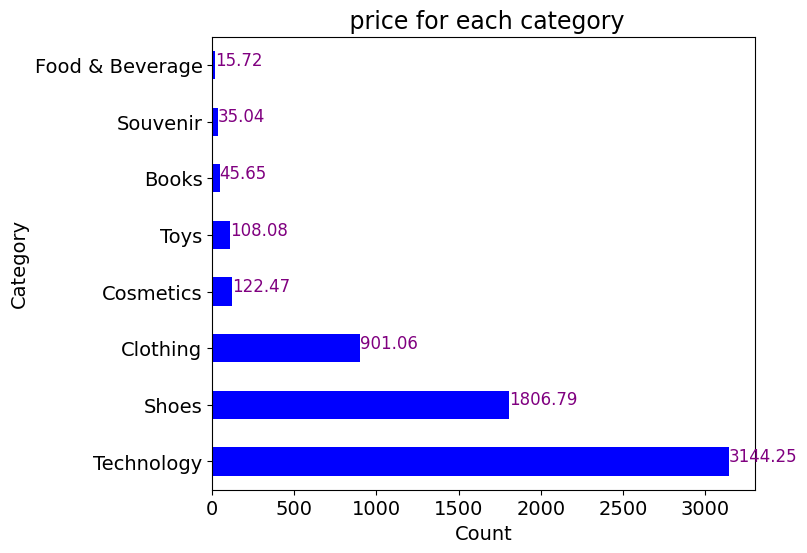

In [ ]:
# horizontal bar chart of each category with average price

category_hbar=df.groupby('category')['price'].mean().sort_values(ascending=False)
fig=plt.figure(figsize=(7,6))

category_hbar.plot(kind='barh',color='blue',fontsize=14)

plt.xlabel("Count",fontsize=14)
plt.ylabel("Category",fontsize=14)
plt.title('Average price for each category',fontsize=17)

fig.set_dpi(100)

for i,count in enumerate(category_hbar):
  plt.text(count,i,str(round(count,2)),color='purple',ha='left',fontsize=12)


plt.show()

In [ ]:
category_hbar=df.groupby('category')['price'].mean()

category
Books                45.568621
Clothing            901.084021
Cosmetics           122.448626
Food & Beverage      15.671948
Shoes              1807.388568
Souvenir             34.894345
Technology         3156.935548
Toys                107.733185
Name: price, dtype: float64

In [ ]:
#calculate count of each payment_count

payment_count=df['payment_method'].value_counts()

In [ ]:
payment_count

Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64

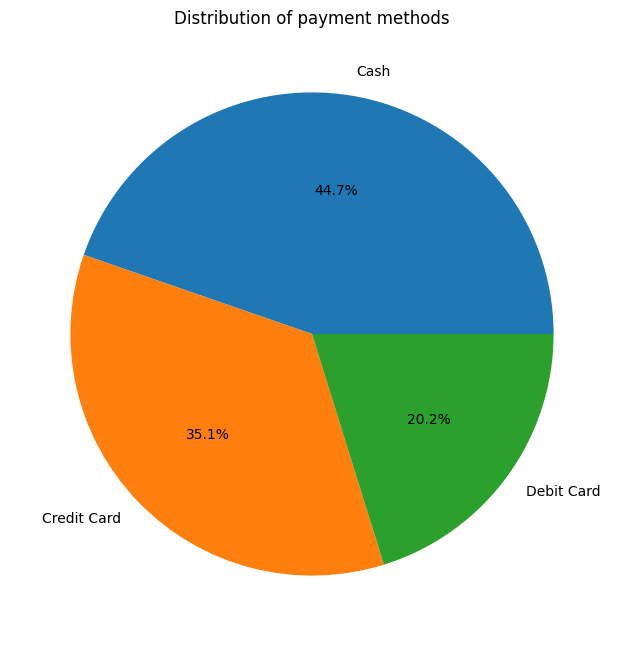

In [ ]:
#create pie chart
fig,ax=plt.subplots(figsize=(10,8))
ax.pie(payment_count,labels=payment_count.index,autopct='%1.1f%%')
ax.set_title("Distribution of payment methods")

fig.set_dpi(100)

plt.show()

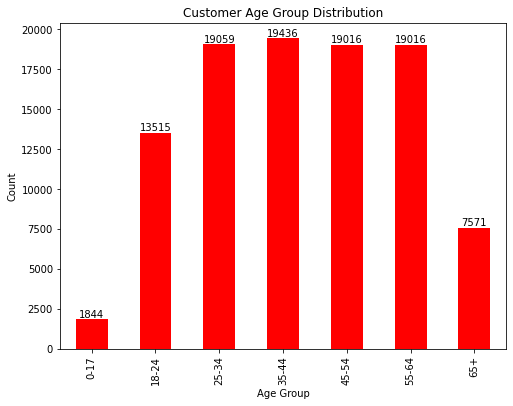

In [7]:
# Define age groups
age_groups = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
# Create age groups based on the age column
df['Age Group'] = pd.cut(df['age'], bins=age_groups, labels=labels)
# Create a histogram of age groups
fig, ax = plt.subplots(figsize=(8, 6))
df['Age Group'].value_counts().sort_index().plot(kind='bar', color='red', ax=ax)
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.set_title('Customer Age Group Distribution')
# Add labels to histogram bars
for i in ax.containers:
  ax.bar_label(i) 

In [8]:
df['Age Group']

0        25-34
1        18-24
2        18-24
3          65+
4        45-54
         ...  
99452    35-44
99453    25-34
99454    55-64
99455    55-64
99456    35-44
Name: Age Group, Length: 99457, dtype: category
Categories (7, object): ['0-17' < '18-24' < '25-34' < '35-44' < '45-54' < '55-64' < '65+']

In [10]:
#count of number of malls 
malls_df=df['shopping_mall'].value_counts()

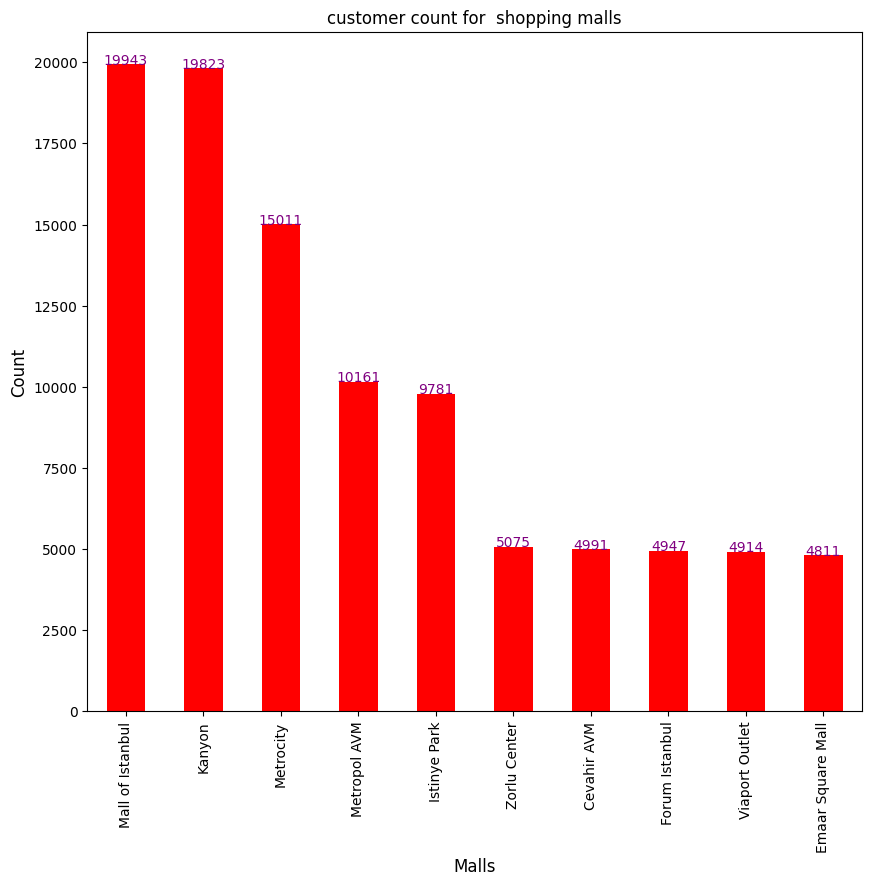

In [42]:
fig,ax=plt.subplots(figsize=(10,9))
malls_df.plot(kind='bar',color='red')
ax.set_xlabel("Malls",fontsize=12)
ax.set_ylabel("Count",fontsize=12)
ax.set_title('customer count for  shopping malls',fontsize=12)

fig.set_dpi(100)
for i,count in enumerate(malls_df):
  plt.text(i,count,str(count),color='purple',ha='center',fontsize=10)
plt.show()

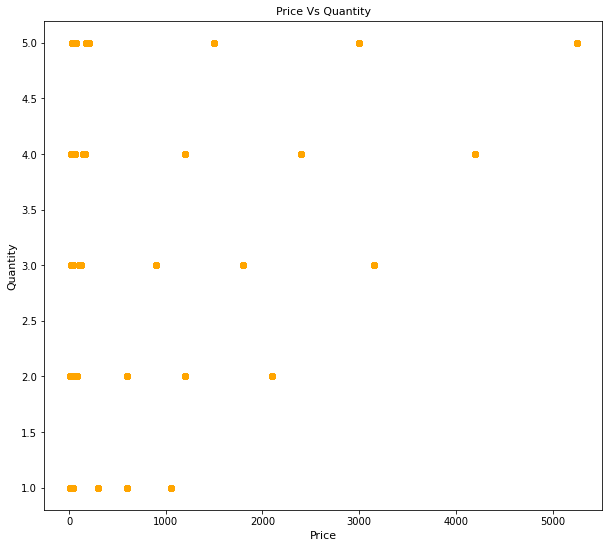

In [41]:
#create a scatter plot to visualize the relationship between price and quantity
plt.figure(figsize=(10,9))

plt.scatter('price','quantity',color='orange',data=df)
plt.xlabel('Price',fontsize=11)
plt.ylabel('Quantity',fontsize=11)
plt.title('Price Vs Quantity',fontsize=11)

fig.set_dpi(100)
plt.show()